In [1]:
!pip install geopandas
!pip install folium==0.10.1


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [18]:
import pandas as pd
import seaborn as sns
import json
import requests
import matplotlib.pyplot as plt 
import geopandas as gp
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_excel('House_Rent_Train.xlsx')

In [20]:
df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df['lease_type']

0        FAMILY
1        ANYONE
2        FAMILY
3        FAMILY
4        FAMILY
          ...  
20550       NaN
20551       NaN
20552       NaN
20553       NaN
20554       NaN
Name: lease_type, Length: 20555, dtype: object

In [21]:
df.drop('amenities',inplace=True,axis=1)

In [22]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20377 entries, 1 to 20531
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20377 non-null  object 
 1   type             20377 non-null  object 
 2   locality         20377 non-null  object 
 3   activation_date  20377 non-null  object 
 4   latitude         20377 non-null  float64
 5   longitude        20377 non-null  float64
 6   lease_type       20377 non-null  object 
 7   gym              20377 non-null  int64  
 8   lift             20377 non-null  int64  
 9   swimming_pool    20377 non-null  int64  
 10  negotiable       20377 non-null  int64  
 11  furnishing       20377 non-null  object 
 12  parking          20377 non-null  object 
 13  property_size    20377 non-null  int64  
 14  property_age     20377 non-null  float64
 15  bathroom         20377 non-null  float64
 16  facing           20377 non-null  object 
 17  cup_board   

In [23]:
df['year']=pd.DatetimeIndex(df['activation_date']).year


In [22]:
df['water_supply']

1        CORPORATION
2          CORP_BORE
3        CORPORATION
4        CORPORATION
5          CORP_BORE
            ...     
20524      CORP_BORE
20528    CORPORATION
20529       BOREWELL
20530      CORP_BORE
20531    CORPORATION
Name: water_supply, Length: 20377, dtype: object

In [24]:
df.drop(columns=['activation_date','id'],inplace=True,axis=1)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20377 entries, 1 to 20531
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           20377 non-null  object 
 1   locality       20377 non-null  object 
 2   latitude       20377 non-null  float64
 3   longitude      20377 non-null  float64
 4   lease_type     20377 non-null  object 
 5   gym            20377 non-null  int64  
 6   lift           20377 non-null  int64  
 7   swimming_pool  20377 non-null  int64  
 8   negotiable     20377 non-null  int64  
 9   furnishing     20377 non-null  object 
 10  parking        20377 non-null  object 
 11  property_size  20377 non-null  int64  
 12  property_age   20377 non-null  float64
 13  bathroom       20377 non-null  float64
 14  facing         20377 non-null  object 
 15  cup_board      20377 non-null  float64
 16  floor          20377 non-null  float64
 17  total_floor    20377 non-null  float64
 18  water_

In [45]:
df['property_age'].value_counts()

 0.0      3312
 10.0     2853
 5.0      2737
 1.0      2104
 3.0      1884
 2.0      1318
 4.0       977
 8.0       948
 7.0       819
 15.0      772
 6.0       771
 20.0      413
 12.0      341
 9.0       325
 25.0      127
 13.0      101
 30.0      100
 11.0       99
 14.0       82
 18.0       59
 16.0       42
 17.0       42
-1.0        33
 40.0       17
 22.0       14
 50.0       12
 19.0       11
 21.0       11
 35.0        9
 23.0        8
 27.0        6
 34.0        5
 45.0        4
 24.0        4
 28.0        3
 26.0        3
 33.0        3
 100.0       2
 37.0        1
 42.0        1
 60.0        1
 80.0        1
 49.0        1
 400.0       1
Name: property_age, dtype: int64

In [25]:
df = df.drop(df[df['property_age'] == -1.0].index)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20344 entries, 1 to 20531
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20344 non-null  object 
 1   type             20344 non-null  object 
 2   locality         20344 non-null  object 
 3   activation_date  20344 non-null  object 
 4   latitude         20344 non-null  float64
 5   longitude        20344 non-null  float64
 6   lease_type       20344 non-null  object 
 7   gym              20344 non-null  int64  
 8   lift             20344 non-null  int64  
 9   swimming_pool    20344 non-null  int64  
 10  negotiable       20344 non-null  int64  
 11  furnishing       20344 non-null  object 
 12  parking          20344 non-null  object 
 13  property_size    20344 non-null  int64  
 14  property_age     20344 non-null  float64
 15  bathroom         20344 non-null  float64
 16  facing           20344 non-null  object 
 17  cup_board   

In [ ]:
lease=label, type=label,facing=label,water_sup=label, building_type=label,furnishing=label,

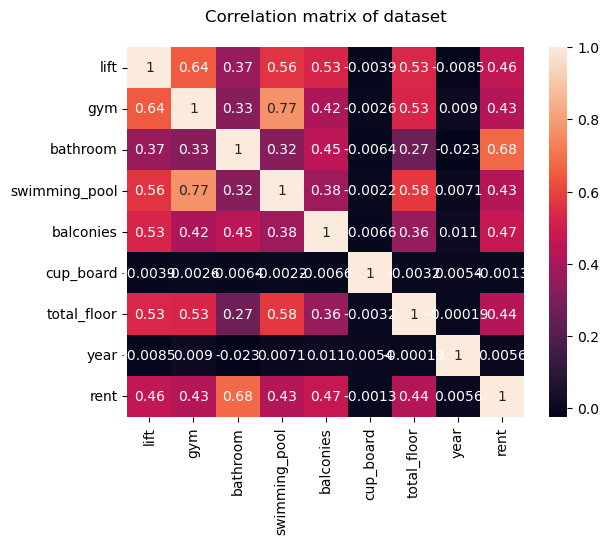

In [75]:
correlation=df[['lift','gym','bathroom','swimming_pool','balconies','cup_board','total_floor','year','rent']].corr()
heatmap=sns.heatmap(correlation,annot=True)
heatmap.set (title = "Correlation matrix of dataset\n")  
plt. show ()  

1                    Bellandur
2                Thiruvanmiyur
3                    Attiguppe
4                    Kodihalli
5         Seetharampalya,Hoodi
                 ...          
20524                   Ulsoor
20528    Koramangala 4th Block
20529       Kumaraswamy Layout
20530              Indiranagar
20531        Malleshwaram West
Name: locality, Length: 20377, dtype: object

In [23]:
df['year']

1        2017
2        2018
3        2018
4        2018
5        2017
         ... 
20524    2017
20528    2017
20529    2017
20530    2018
20531    2018
Name: year, Length: 20377, dtype: int64

In [76]:
rent=df.groupby(['locality'])['rent'].mean().sort_values(ascending=False).reset_index()
rent

,locality,rent
0,"Junnasandra, Bengaluru, Karnataka, India",50000.0
1,"Tasker Town,Shivaji Nagar",50000.0
2,"Krishvi Dhavala, Doddakannelli, Bellandur, Ben...",50000.0
3,"Chennammanakere Achukattu,",50000.0
4,"Devarabisanahalli, Bellandur",50000.0
...,...,...
1912,Garden Villas,8000.0
1913,"Anayappa Garden, HAL 3rd Stage",8000.0
1914,Kasthuriba Nagar,8000.0
1915,"Gandhipuram, Whitefield",8000.0


In [77]:
fig = px.scatter(rent,x='locality', y='rent',color='rent')
fig.show()

In [78]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Interactive scatter plot with rent'),
    dcc.Graph(id="scatter-plot"),
    html.P("Filter by rent:"),
    dcc.RangeSlider(
        id='range-slider',
        min=8000, max=50000, step=1,
        marks={8000: '8000', 50000: '50000'},
        value=[0.5, 2]
    ),
])


@app.callback(
    Output("scatter-plot", "figure"), 
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    df = rent # replace with your own data source
    low, high = slider_range
    mask = (df['rent'] > low) & (df['rent'] < high)
    fig = px.scatter(
        df[mask], x="rent", y="locality", 
        color="rent", 
        hover_data=['rent'])
    return fig


app.run_server(debug=True)

In [79]:
year_rent=df.groupby(['year','locality'])['rent'].mean().astype(int).reset_index()

In [80]:
year_rent

,year,locality,rent
0,2017,#8 1st main. 4th cross Bhuvaneshwari nagar. c...,11500
1,2017,"1, Kariyammana Agrahara Rd, Kadubeesanahalli, ...",18000
2,2017,"11, Hanumappa Road, Bhoomi Reddy Colony, Benga...",12000
3,2017,"12th cross, Vird Nagar Main Road, NGR Layout, ...",22800
4,2017,"14, 5th Cross Rd, Murugesh Pallya, Nanja Reddy...",20000
...,...,...,...
2476,2018,varthur,12000
2477,2018,vignan nagar,12000
2478,2018,vijayanagar,20000
2479,2018,"white midas apartment, ECC road. Pattandur Agr...",30000


In [81]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Interactive scatter plot with avarage rent_locality'),
    dcc.Graph(id="scatter-plot"),
    html.P("Filter by rent:"),
    dcc.RangeSlider(
        id='range-slider',
        min=8000, max=50000, step=1,
        marks={8000: '8000', 50000: '50000'},
        value=[0.5, 2]
    ),
])


@app.callback(
    Output("scatter-plot", "figure"), 
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    df = year_rent 
    low, high = slider_range
    mask = (df['rent'] > low) & (df['rent'] < high)
    fig = px.scatter(
        df[mask], x="rent", y="year", 
        color="rent", 
        hover_data=['locality'])
    return fig


app.run_server(debug=True)

In [82]:
floor=df.groupby(['floor','locality'])['rent'].mean().astype(int).sort_values(ascending=False).reset_index()

In [83]:
floor

,floor,locality,rent
0,0.0,"Chennammanakere Achukattu,",50000
1,5.0,"Bairasandra Extension,Jayanagar",50000
2,12.0,Sarjapur Road Till Wipro,50000
3,9.0,"Binny Mills Employees Colony,JP Nagar",50000
4,9.0,Banashankari,50000
...,...,...,...
4078,1.0,"Gandhipuram, Whitefield",8000
4079,1.0,Gavipuram,8000
4080,1.0,Someshwara Nagar,8000
4081,2.0,Garebhavipalya,8000


In [84]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Interactive scatter plot with floor_rent_locality'),
    dcc.Graph(id="scatter-plot"),
    html.P("Filter by floor:"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=25, step=1,
        marks={0: '0', 25: '25'},
        value=[0.5, 2]
    ),
])


@app.callback(
    Output("scatter-plot", "figure"), 
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    df = floor 
    low, high = slider_range
    mask = (df['floor'] > low) & (df['floor'] < high)
    fig = px.scatter(
        df[mask], x="floor", y="rent", 
        color="rent", size='rent',
        hover_data=['locality'])
    return fig


app.run_server(debug=True)

In [88]:
property_size=df.groupby(['locality','property_size'])['rent'].mean().astype(int).sort_values(ascending=False).reset_index()
property_size

,locality,property_size,rent
0,Kaikondrahalli,1876,50000
1,Indira Nagar,1400,50000
2,Jakkasandra,1800,50000
3,Banashankari Stage I,2300,50000
4,CV Raman Nagar,1980,50000
...,...,...,...
9902,Jaya Nagar 9th Block,400,8000
9903,Banashankari 3rd Stage,200,8000
9904,Banashankari 3rd Stage,300,8000
9905,Udaya Nagar,400,8000


In [89]:
df['property_size'].sort_values(ascending=False)

6075     50000
549      13000
16379    12000
5144     10200
17049     6040
         ...  
8844        11
3354         6
7289         3
13582        1
7873         1
Name: property_size, Length: 20377, dtype: int64

In [90]:
property_rent_analysis=px.scatter(property_size,x='property_size',y='rent',color='rent',hover_data=['locality'])

In [91]:
property_rent_analysis

In [105]:
lease_type_rent=df.groupby(['lease_type'])['rent'].mean().astype(int).sort_values(ascending=False).reset_index()
type_lease_type_rent

,lease_type,rent
0,COMPANY,28546
1,FAMILY,19765
2,ANYONE,18599
3,BACHELOR,13085


In [106]:
lease_type_rent_analysis=px.bar(type_lease_type_rent,x='lease_type',y='rent',color='lease_type',hover_data=['lease_type'])

In [103]:
df['lease_type'].unique()

array(['ANYONE', 'FAMILY', 'BACHELOR', 'COMPANY'], dtype=object)

In [107]:
lease_type_rent_analysis

In [ ]:
type_rent=df.groupby(['lease_type'])['rent'].mean().astype(int).sort_values(ascending=False).reset_index()


In [9]:
df.skew()

latitude           0.131908
longitude         13.539811
gym                1.307581
lift               0.578678
swimming_pool      1.714929
negotiable        -0.932454
property_size     29.195168
property_age      13.377869
bathroom           1.530518
cup_board        142.627857
floor              2.928717
total_floor        2.706202
balconies          0.860969
rent               1.066166
year              -0.568715
dtype: float64

In [26]:
import numpy as np

In [27]:
df.drop(['latitude','longitude'],axis=1,inplace=True)

In [30]:
df.drop(['negotiable'],axis=1,inplace=True)

In [40]:
df.drop(['total_floor'],axis=1,inplace=True)

In [28]:
df['tr_cup_board']=np.log([x+1 for x in df['cup_board']])
# df['tr_lease_commence_date']=np.log(df['lease_commence_date'])

In [29]:
df['tr_property_size']=np.log(df['property_size'])

In [34]:
df['tr_property_age']=np.log([x+1 for x in df['property_age']])

In [38]:
df['tr_floor']=np.log([x+1 for x in df['floor']])

In [44]:
df['tr_balconies']=np.log([x+1 for x in df['balconies']])

In [45]:
df['tr_rent']=np.log(df['rent'])

In [49]:
df.drop(['tr_year'],axis=1,inplace=True)

In [59]:
df.drop(['cup_board','property_size','property_age','floor','balconies','rent'],axis=1,inplace=True)

In [99]:
df.drop(['locality'],axis=1,inplace=True)

In [68]:
df['parking'].unique()

array(['BOTH', 'TWO_WHEELER', 'NONE', 'FOUR_WHEELER'], dtype=object)

In [66]:
df.columns

Index(['type', 'locality', 'lease_type', 'gym', 'lift', 'swimming_pool',
       'furnishing', 'parking', 'bathroom', 'facing', 'water_supply',
       'building_type', 'year', 'tr_cup_board', 'tr_property_size',
       'tr_property_age', 'tr_floor', 'tr_balconies', 'tr_rent'],
      dtype='object')

In [97]:
df['tr_rent'].unique()

array([ 9.99879773, 10.23995979,  8.98719682, 10.71441777,  9.79812704,
       10.37349118,  9.21034037,  9.87816974,  9.43348392,  9.30565055,
       10.38899537,  9.39266193,  9.61580548,  9.82552601,  9.95227772,
       10.08580911, 10.20359214,  9.54681261, 10.49127422,  9.90348755,
        9.680344  ,  9.10497986, 10.1266311 , 10.77895629, 10.34174248,
        9.85219426, 10.81977828, 10.30895266,  9.74096862,  9.51044496,
       10.46310334,  9.03598698, 10.04324949,  9.47270464, 10.6454249 ,
       10.40426284, 10.16585182,  9.15904708, 10.59663473, 10.54534144,
        9.25913054, 10.22194128,  9.71111566, 10.27505111,  9.76995616,
        9.58190393,  9.04782144,  9.81465634,  9.35010231,  9.98966525,
        9.13776968, 10.0647557 , 10.62132735,  9.97580821,  9.01188943,
       10.1064284 , 10.57131693,  9.57498349, 10.18490001,  9.67407439,
        9.14846497, 10.69194491, 10.02127059,  9.92818017, 10.66895539,
       10.53209621,  9.43308384, 10.55841352, 10.25765937,  9.64

In [ ]:
lease=label, type=label,facing=label,water_sup=label, building_type=label,furnishing=label,

In [75]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [53]:
label_encoder = preprocessing.LabelEncoder()


In [69]:
label_enc_colum=['type','facing','water_supply','building_type','furnishing','lease_type','parking']

In [70]:
for i in label_enc_colum:
    df[i]=label_encoder.fit_transform(df[i])

In [100]:
X=df.drop('tr_rent',axis=1)
y=df['tr_rent']

In [101]:
X

,type,lease_type,gym,lift,swimming_pool,furnishing,parking,bathroom,facing,water_supply,building_type,year,tr_cup_board,tr_property_size,tr_property_age,tr_floor,tr_balconies
1,2,0,0,1,0,2,0,2.0,2,1,0,2017,1.098612,7.244228,1.609438,1.386294,1.098612
2,3,3,0,1,0,2,0,3.0,0,2,0,2018,1.386294,7.207860,1.945910,0.693147,1.386294
3,1,3,0,0,0,2,3,1.0,0,1,3,2018,0.693147,6.396930,1.386294,0.693147,0.000000
4,3,3,0,0,0,2,0,3.0,0,1,3,2018,1.609438,7.313220,2.772589,0.000000,0.693147
5,1,3,1,1,1,2,0,2.0,0,2,0,2017,0.693147,6.984716,0.000000,1.386294,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,1,0,0,1,0,2,3,2.0,0,2,0,2017,0.693147,6.745236,3.433987,0.693147,0.693147
20528,2,0,0,0,0,2,0,2.0,1,1,3,2017,1.098612,6.907755,2.397895,0.693147,1.098612
20529,2,3,1,1,0,2,0,2.0,7,0,0,2017,1.098612,6.907755,0.000000,1.791759,1.098612
20530,2,3,0,1,0,2,0,2.0,0,2,0,2018,1.098612,6.907755,1.791759,1.098612,1.386294


In [102]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

# r_2=r2_score(y_test, pred)

# mse=mean_squared_error(y_test, pred)

# mae=mean_absolute_error(y_test, pred)

In [115]:
r_2=r2_score(y_test, pred)

mse=mean_squared_error(y_test, pred)

mae=mean_absolute_error(y_test, pred)

In [116]:
r_2

0.662357321514423

In [106]:
mse

0.06211379197703491

In [107]:
mae

0.19651069464247523

In [117]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)

In [118]:
r_2=r2_score(y_test, pred)

mse=mean_squared_error(y_test, pred)

mae=mean_absolute_error(y_test, pred)

In [119]:
r_2

0.3850496177868479

In [111]:
mse

0.11303966943035205

In [120]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
pred=et.predict(x_test)

In [121]:
r_2=r2_score(y_test, pred)

mse=mean_squared_error(y_test, pred)

mae=mean_absolute_error(y_test, pred)

In [122]:
r_2

0.6672238312748744

In [123]:
mse

0.06121853378197885

In [124]:
mae

0.1944913249286511

In [125]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)

In [126]:
r_2=r2_score(y_test, pred)

mse=mean_squared_error(y_test, pred)

mae=mean_absolute_error(y_test, pred)

In [127]:
r_2

0.6906616234833793

In [128]:
mse

0.05690684499852953

In [129]:
mae

0.1891513115291202

In [130]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [131]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove t

/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove t

/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove t

/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove t

/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove t

/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove t

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   9.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  28.4s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 2.6min
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  30.2s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.1min
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 1.6min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  29.2s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   9.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  28.5s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 2.6min
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  30.1s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.1min
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  21.6s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  21.8s
[CV] END bootstrap=False, max_depth=90

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  28.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  21.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 2.5min
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  20.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  20.5s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 1.5min
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 1.6min
[CV] END bootstrap=False, max_depth=1

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   9.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  19.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  21.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  23.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  22.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  22.7s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  19.8s
[CV] END bootstrap=False, max_depth=30, 

In [133]:
print(rf_random.best_params_)


{'n_estimators': 1600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


In [135]:
rf = RandomForestRegressor(n_estimators=100,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=20,bootstrap=True)

In [136]:
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

In [137]:
r_2=r2_score(y_test, pred)

mse=mean_squared_error(y_test, pred)

mae=mean_absolute_error(y_test, pred)

In [138]:
r_2

0.7075809370467319

In [139]:
mse

0.05379431571822057

In [140]:
mae

0.1843642020782361

In [141]:
import pickle